# Laptop-Analyse

In [2]:
%reload_ext autoreload
%autoreload 2
# import matplotlib as mpl
# import matplotlib.pyplot as plt
# %matplotlib inline
# import numpy as np
# import pandas as pd
import fairtronics_engine as ft

## Einführung

Die Berechnungskette ist 

**Portfolio** F --*(items)*---> **Device** D --*(items)*---> **Part** P --*(gram)*---> **Material** M --*(gram <)*---> **Resource** R --*(gram =)*---> **Country** C

Die drei Datenquellen sind:
  * **Database** = die noch zusammenhanglosen Objekte der Berechnungskette, also F, D, P, C, R und C
  * **Inventory** = die Bereitstellung eines konkreten Objekts, z.B. eines Device, entstehend aus Teilen einer Database
  * **Assessment** = die Bilanz eines solchen konkreten Objekts bzgl. eines Sozialindikators, entstehend aus einem Inventory. 

Aspekte von Inventories und Assessments können angezeigt werden. Zunächst definiert man sich eine Ausschnitt (**view**), den man sich mittels ein paar Operationen noch zurechtbiegt (**sort, threshold, cutoff, cutother, nozeros, group, top, bottom, select, exclude, show**), bevor man sich ihn anzeigen lässt (**value, table, pie, bar**). Zwei Ausschitte/Views lassen sich auch vergleichend anzeigen (**percentageof, differenceto, distanceto, multipleof**).

Jeder Indikator (aktuell **child labour, forced labour, wage-risk, wage-chance**) weist jedem Land eine Arbeitsrisiko-/-chancewahrscheinlichkeit zu, wobei Arbeitszeit äquivalent zu Gewicht der Ressourcen eines Landes angenommen wird, letztlich also 

**Country** --*(gram >)*--> **Risk/Chance**

## Datenbasis

In [3]:
database = ft.Database("../fairtronics-data/target/full")

Read database ../fairtronics-data/target/full


In [3]:
database.list(ft.PART).count()

Number of all parts in database ../fairtronics-data/target/full:


340

In [7]:
database.list(ft.PART).sort("category", ascending=True).table()

All parts (sorted by category) in database ../fairtronics-data/target/full:


In [5]:
database.list(ft.PART).group(by="manufacturer").count()

Number of all parts, grouped by manufacturer in database ../fairtronics-data/target/full:


81

In [3]:
database.list(ft.DEVICE).table(index=True, columns=["name"])

All devices in database ../fairtronics-data/target/full:


In [8]:
database.info(ft.DEVICE, "mnt-reform").table()

'mnt-reform' in Devices:


In [5]:
database.list(ft.LOCATION).count()

Number of all locations in database ../fairtronics-data/target/full:


260

## MNT Reform Laptop

In [6]:
mnt_reform = ft.Unit(database, ft.DEVICE, "mnt-reform")

In [13]:
mnt_reform.analyse("P").view().count()

Number of parts in Device 'MNT Reform 2.0 Laptop':


233

In [14]:
mnt_reform.analyse("P").view().sum()

Sum of amount of parts in Device 'MNT Reform 2.0 Laptop':


1699.7236456903781

In [15]:
mnt_reform.analyse("P").view().group(by="part manufacturer").count()

Number of parts, grouped by part manufacturer in Device 'MNT Reform 2.0 Laptop':


69

In [22]:
mnt_reform.analyse("Pm").view().group(by="part category").sort(by="amount").table()

Materials level of parts, grouped by part category in Device 'MNT Reform 2.0 Laptop':


In [17]:
mnt_reform.analyse("Dm").view().amount()

Amount of materials level of device in Device 'MNT Reform 2.0 Laptop':


2195.564430626522

In [18]:
mnt_reform.analyse("Dr").view().amount()

Amount of resources level of device in Device 'MNT Reform 2.0 Laptop':


84443.38690571471

In [19]:
mnt_reform.analyse("Dr[circularity=recycled]").view().amount()

Amount of resources level of device (12 of them only) in Device 'MNT Reform 2.0 Laptop':


585.9437242827354

In [20]:
mnt_reform.analyse("M").view().count()

Number of materials in Device 'MNT Reform 2.0 Laptop':


248

In [11]:
mnt_reform.analyse("M").view_top(50).table()

Materials in Device 'MNT Reform 2.0 Laptop':


In [24]:
mnt_reform.analyse("R").view().count()

Number of resources in Device 'MNT Reform 2.0 Laptop':


60

In [25]:
mnt_reform.analyse("C").view().count()

Number of countries in Device 'MNT Reform 2.0 Laptop':


165

In [26]:
mnt_reform.analyse("M").view_top(5).table(columns=[ft.SHARE, ft.NAME])

Materials in Device 'MNT Reform 2.0 Laptop':


In [5]:
mnt_reform.analyse("R").view().sum()

Sum of amount of resources in Device 'MNT Reform 2.0 Laptop':


84443.38690571471

In [27]:
mnt_reform.analyse("R").view_top(5).table()

Resources in Device 'MNT Reform 2.0 Laptop':


In [28]:
mnt_reform.analyse("R[circularity=recycled]").view_top(5).table(columns=[ft.SHARE, ft.NAME])

Resources (12 of them only) in Device 'MNT Reform 2.0 Laptop':


In [5]:
mnt_reform.analyse("C").view_top_other(10).table()

Locations in Device 'MNT Reform 2.0 Laptop':


Countries in Device 'MNT Reform 2.0 Laptop':


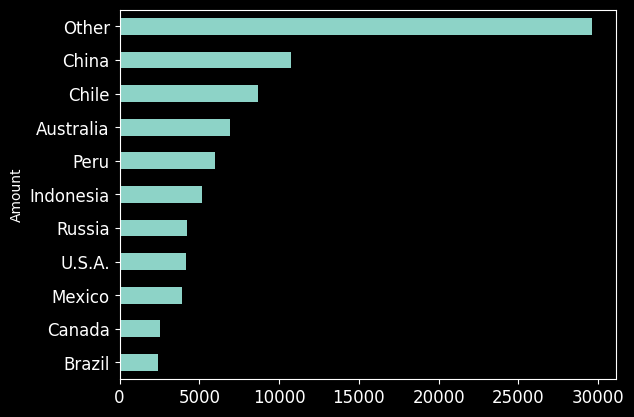

In [29]:
mnt_reform.analyse("C").view_top_other(10).bar()

In [31]:
mnt_reform.analyse("Rc[china]").view_top(5).table()

Countries level of resources (china only) in Device 'MNT Reform 2.0 Laptop':


## Sozialbilanz eines Laptop

In [7]:
mnt_reform.analyse("Di[forced-labour]").view().table(columns=["amount","unit","name"])

Indicators level of device (forced labour only) in Device 'MNT Reform 2.0 Laptop':


In [33]:
mnt_reform.analyse("Di[forced-labour]").view().percentageof(mnt_reform.analyse("Dr").view()).value()

Value of percentage of “indicators level of device (forced labour only)” within “resources level of device” in Device 'MNT Reform 2.0 Laptop':


0.37994388014543373

In [6]:
mnt_reform.analyse("Di[child-labour]").view().table(columns=[ft.AMOUNT,ft.UNIT,ft.NAME])

Indicators level of device (child labour only) in Device 'MNT Reform 2.0 Laptop':


In [8]:
mnt_reform.analyse("Di[child-labour]").view().percentageof(mnt_reform.analyse("Dr").view()).value()

Value of percentage of “indicators level of device (child labour only)” within “resources level of device” in Device 'MNT Reform 2.0 Laptop':


2.0679040500186914

In [36]:
mnt_reform.analyse("Di[wage-risk]").view().percentageof(mnt_reform.analyse("Dr").view()).value()

Value of percentage of “indicators level of device (wage risk only)” within “resources level of device” in Device 'MNT Reform 2.0 Laptop':


5.489756589595168

#### Supply chain analysis

In [45]:
mnt_reform.analyse("Ci[forced-labour]").view_top_other(5).table(columns=[ft.RANK,ft.AMOUNT,ft.UNIT,ft.SHARE,ft.NAME,"location region","location sub region"])

Indicators level of countries (forced labour only) in Device 'MNT Reform 2.0 Laptop':


In [46]:
mnt_reform.analyse("Ri[forced-labour]").view_top(20).table(columns=[ft.RANK,ft.AMOUNT,ft.UNIT,ft.SHARE,ft.NAME])

Indicators level of resources (forced labour only) in Device 'MNT Reform 2.0 Laptop':


In [48]:
mnt_reform.analyse("Mi[forced-labour]").view_top_other(5).table(columns=ft.SHOW_STANDARD)

Indicators level of materials (forced labour only) in Device 'MNT Reform 2.0 Laptop':


In [50]:
mnt_reform.analyse("Pi[forced-labour]").view().group(by="part category").top(5).table(columns=ft.SHOW_STANDARD_GROUPED)

Top 5 indicators level of parts (forced labour only), grouped by part category in Device 'MNT Reform 2.0 Laptop':


#### Contribution Analysis

In [51]:
mnt_reform.analyse("Pi[forced-labour]").view_top(10).table(index=True,columns=ft.SHOW_STANDARD)

Indicators level of parts (forced labour only) in Device 'MNT Reform 2.0 Laptop':


In [52]:
mnt_reform.analyse("p[pcbway-mnt_reform_motherboard_pcb]Mi[forced-labour]").view_top(10).table(index=True,columns=ft.SHOW_STANDARD)

Indicators level of materials (motherboard pcb & forced labour only) in Device 'MNT Reform 2.0 Laptop':


In [53]:
mnt_reform.analyse("p[pcbway-mnt_reform_motherboard_pcb]m[copper]Ri[forced-labour]") \
                        .view_top(10).table(index=True,columns=ft.SHOW_STANDARD)

Indicators level of resources (motherboard pcb & copper & forced labour only) in Device 'MNT Reform 2.0 Laptop':


In [55]:
mnt_reform.analyse("p[pcbway-mnt_reform_motherboard_pcb]m[copper]r[copper_ground]Ci[forced-labour]") \
                        .view_top(10).table(columns=ft.SHOW_STANDARD)

Indicators level of countries (motherboard pcb & copper & copper ore & forced labour only) in Device 'MNT Reform 2.0 Laptop':


In [56]:
mnt_reform.analyse("p[pcbway-mnt_reform_motherboard_pcb]m[epoxy_resin]Ri[forced-labour]") \
                        .view_top(10).table(index=True,columns=ft.SHOW_STANDARD)

Indicators level of resources (motherboard pcb & epoxy resin & forced labour only) in Device 'MNT Reform 2.0 Laptop':


In [57]:
mnt_reform.analyse("p[pcbway-mnt_reform_motherboard_pcb]m[epoxy_resin]r[salt]Ci[forced-labour]") \
                        .view_top(10).table(columns=ft.SHOW_STANDARD)

Indicators level of countries (motherboard pcb & epoxy resin & salt & forced labour only) in Device 'MNT Reform 2.0 Laptop':


In [58]:
mnt_reform.analyse("PRCi[forced-labour]").view_top(10).table(columns=ft.SHOW_STANDARD)

Indicators level of combinations of parts/resources/countries (forced labour only) in Device 'MNT Reform 2.0 Laptop':


In [60]:
mnt_reform.analyse("P[unknown-solder-paste-100g]R[tin_ground]C[myanmar]i[forced-labour]").view().percentageof(
    mnt_reform.analyse("P[unknown-solder-paste-100g]R[tin_ground]C[myanmar]").view()).value()

Value of percentage of “indicators level of combinations of parts/resources/countries (solder paste sn96.5ag3cu0.5 100g & tin ore & myanmar & forced labour only)” within “combinations of parts/resources/countries (solder paste sn96.5ag3cu0.5 100g & tin ore & myanmar only)” in Device 'MNT Reform 2.0 Laptop':


1.0999999999999999

In [61]:
mnt_reform.analyse("Ci[forced-labour]").view().select("name", "India").table(columns=ft.SHOW_STANDARD)

Indicators level of countries (forced labour only) where name is india in Device 'MNT Reform 2.0 Laptop':


### Fairness beim Rohstoffabbau

Indicators level of combinations of resources/countries (forced labour only) in Device 'MNT Reform 2.0 Laptop':


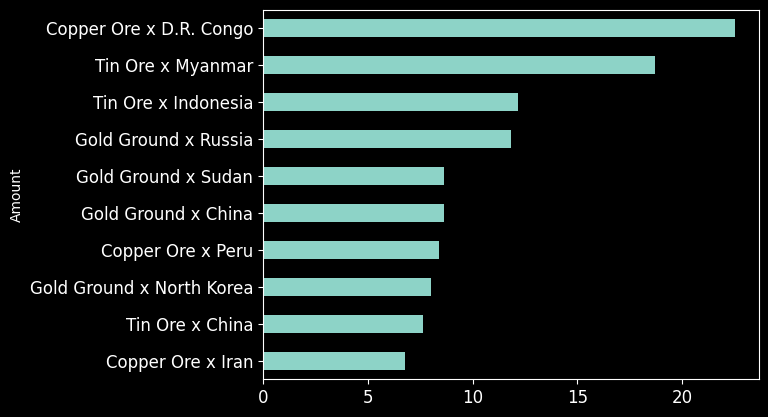

In [62]:
mnt_reform.analyse("RCi[forced-labour]").view_top(10).bar()

Indicators level of combinations of resources/countries (forced labour only) in Device 'MNT Reform 2.0 Laptop':


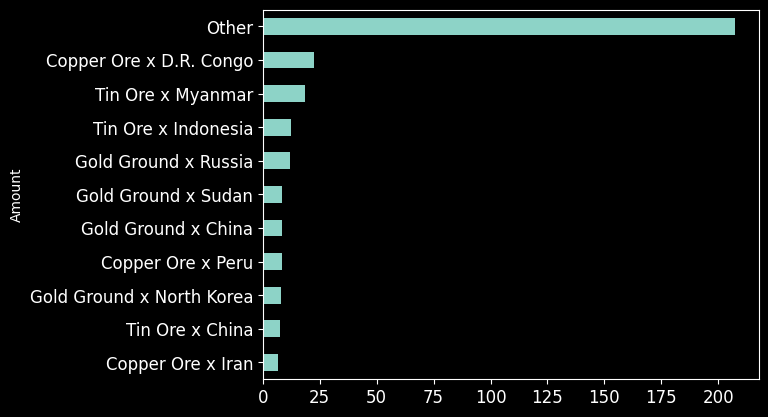

In [63]:
mnt_reform.analyse("RCi[forced-labour]").view_top_other(10).bar()

Indicators level of combinations of resources/countries (child labour only) in Device 'MNT Reform 2.0 Laptop':


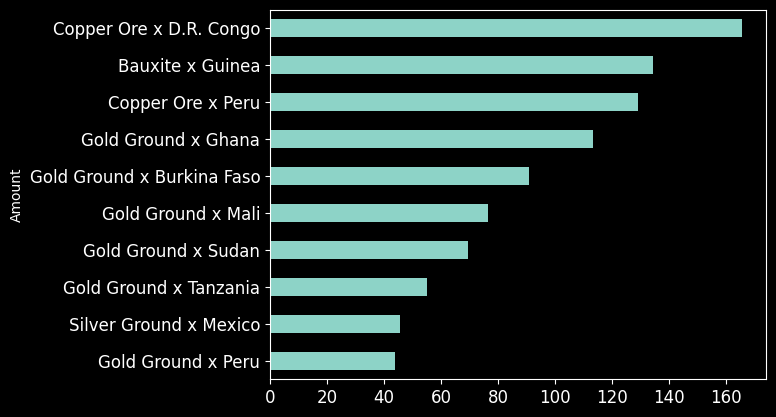

In [64]:
mnt_reform.analyse("RCi[child-labour]").view_top(10).bar()

Indicators level of combinations of resources/countries (wage risk only) in Device 'MNT Reform 2.0 Laptop':


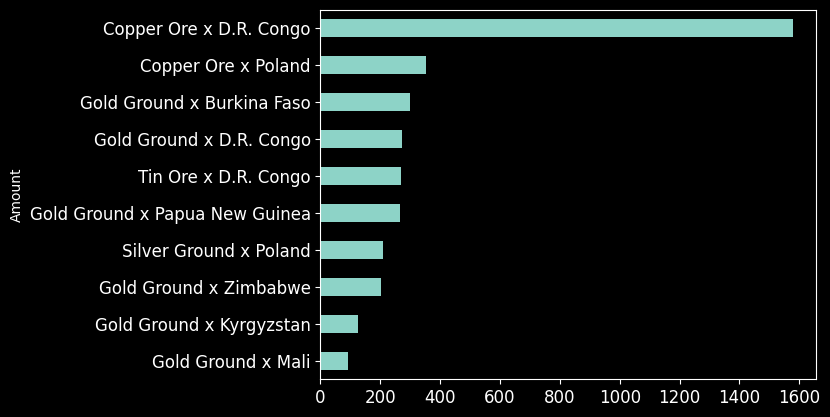

In [65]:
mnt_reform.analyse("RCi[wage-risk]").view_top(10).bar()

Indicators level of combinations of resources/countries (wage chance only) in Device 'MNT Reform 2.0 Laptop':


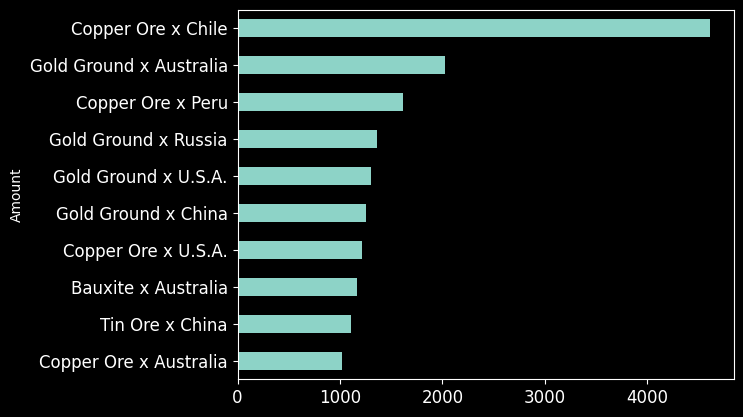

In [66]:
mnt_reform.analyse("RCi[wage-chance]").view_top(10).bar()

#### Warum Peru?

Indicators level of countries (child labour only) in Device 'MNT Reform 2.0 Laptop':


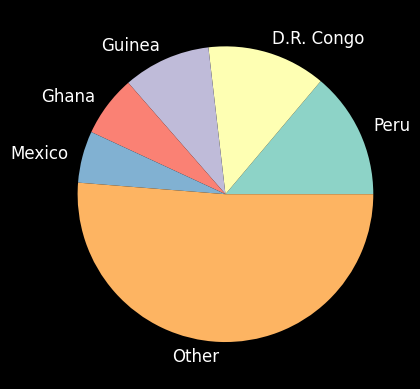

In [67]:
mnt_reform.analyse("Ci[child-labour]").view_top_other(5).pie()

In [69]:
mnt_reform.analyse("Ci[child-labour-unknown]").view_top(10).table(columns=ft.SHOW_STANDARD)

Indicators level of countries (child labour (unknown) only) in Device 'MNT Reform 2.0 Laptop':


Countries in Device 'MNT Reform 2.0 Laptop':


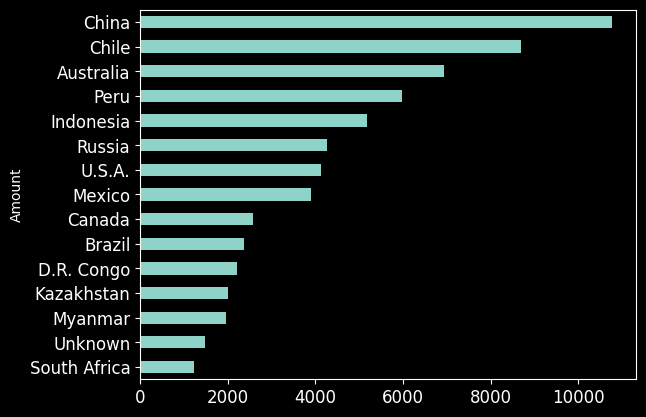

In [70]:
mnt_reform.analyse("C").view_top(15).bar()

In [72]:
mnt_reform.analyse("Rc[peru]").view().differenceto(mnt_reform.analyse("Rc[congo-dr]").view()).table()

Difference between “countries level of resources (peru only)” and “countries level of resources (congo (democratic republic of the) only)” in Device 'MNT Reform 2.0 Laptop':


In [73]:
mnt_reform.analyse("Rc[peru]i[child-labour]").view().differenceto(mnt_reform.analyse("Rc[chile]i[child-labour]").view()).table()

Difference between “indicators level of resources (peru & child labour only)” and “indicators level of resources (chile & child labour only)” in Device 'MNT Reform 2.0 Laptop':


### Sorgfaltspflicht des Geräteherstellers

In [74]:
mnt_reform.analyse("PRi[child-labour]").view_top(10).table(columns=[ft.AMOUNT,ft.UNIT,ft.SHARE,ft.NAME,"part category"])

Indicators level of combinations of parts/resources (child labour only) in Device 'MNT Reform 2.0 Laptop':


#### Analyse für den kritischsten Hersteller

Indicators level of parts (human rights (child or forced labour) only), grouped by part manufacturer with share % of at least 4.0 (aside other) in Device 'MNT Reform 2.0 Laptop':


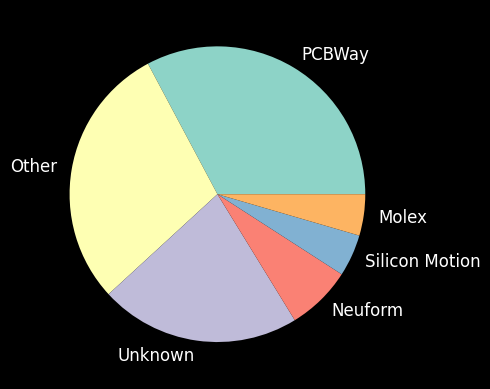

In [75]:
mnt_reform.analyse("Pi[human-rights]").view().group(by="part manufacturer").cutother(4.00).pie()

In [76]:
mnt_reform.analyse("p[manufacturer=pcbway]Mi[human-rights]").view().table(index=True, columns=ft.SHOW_STANDARD)

Indicators level of materials (8 of them only) in Device 'MNT Reform 2.0 Laptop':


In [77]:
mnt_reform.analyse("p[manufacturer=pcbway]m[gold]Ri[human-rights]").view().table(index=True)

Indicators level of resources (9 of them only) in Device 'MNT Reform 2.0 Laptop':


Indicators level of countries (10 of them only) in Device 'MNT Reform 2.0 Laptop':


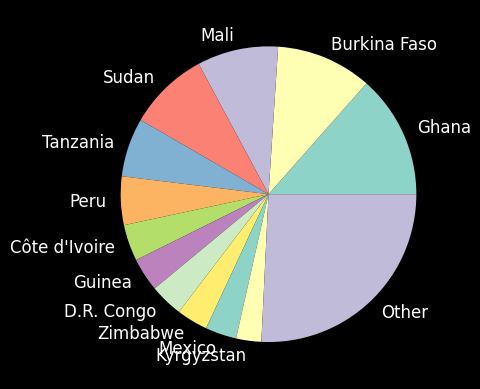

In [83]:
mnt_reform.analyse("p[manufacturer=pcbway]m[gold]r[gold_ground]Ci[human-rights]").view_cut_other(cutoff=10.0).pie()

Indicators level of combinations of resources/countries (8 of them only) in Device 'MNT Reform 2.0 Laptop':


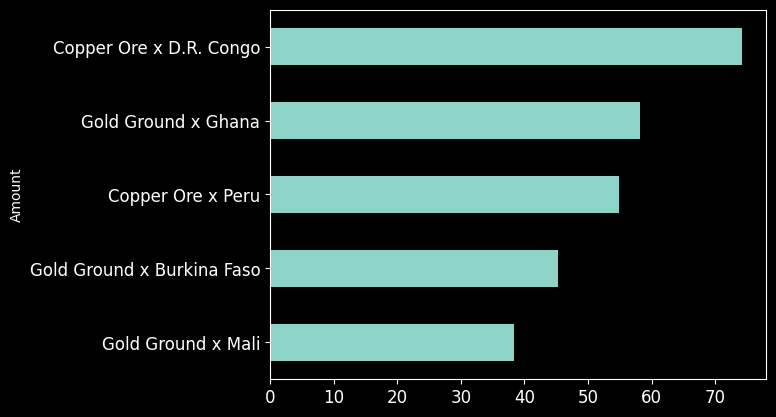

In [84]:
mnt_reform.analyse("p[manufacturer=pcbway]mRCi[human-rights]").view_top(5).bar()

In [85]:
mnt_reform.analyse("P[manufacturer=silicon_motion]Mi[human-rights]").view().table(columns=ft.SHOW_STANDARD)

Indicators level of combinations of parts/materials (ultra high speed pcie gen3 x4 nvme 1.3 ssd controller & human rights (child or forced labour) only) in Device 'MNT Reform 2.0 Laptop':


In [86]:
mnt_reform.analyse("P[manufacturer=molex]Mi[human-rights]").view().group(by='part category').sorted().table()

Indicators level of combinations of parts/materials (24 of them only), grouped by part category in Device 'MNT Reform 2.0 Laptop':


In [87]:
mnt_reform.analyse("P[manufacturer=molex]Mi[human-rights]").view().group(by='material short name').cutother(1.0).sorted().table()

Indicators level of combinations of parts/materials (24 of them only), grouped by material short name with share % of at least 1.0 (aside other) in Device 'MNT Reform 2.0 Laptop':


Indicators level of parts (human rights (child or forced labour) only), grouped by part category with share % of at least 1.0 (aside other) in Device 'MNT Reform 2.0 Laptop':


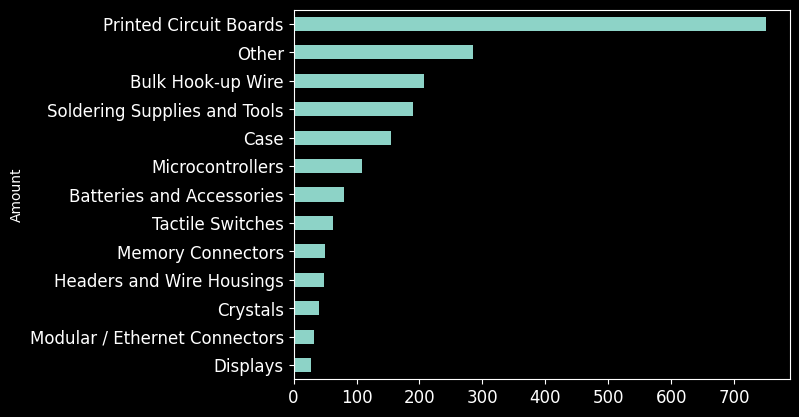

In [88]:
mnt_reform.analyse("Pi[human-rights]").view().group(by='part category').cutother(1.0).sorted().bar()

#### Dodd-Frank-Analyse

In [6]:
mnt_reform_df_only = ft.Unit(database, ft.DEVICE, "mnt-reform", "pmr[gold_ground|tin_ground|tantalum_ground|tungsten_ground]c[congo-dr|rwanda|uganda|burundi]")

In [8]:
mnt_reform_df_only.analyse("RC").view_cut_other(0.1).sorted().table(columns=[ft.RANK,ft.NAME])

Combinations of resources/countries (sorted by rank) in Device 'MNT Reform 2.0 Laptop':


In [9]:
mnt_reform_df_only.analyse("PRC").view_top(10).table()

Combinations of parts/resources/countries in Device 'MNT Reform 2.0 Laptop':


In [10]:
mnt_reform_df_only.analyse("PRC").view().group(by="part manufacturer").top(10).table(columns=["amount","unit","name"])

Top 10 combinations of parts/resources/countries, grouped by part manufacturer in Device 'MNT Reform 2.0 Laptop':


In [11]:
mnt_reform_df_only.analyse("M").view().sorted().table()

Materials (sorted by rank) in Device 'MNT Reform 2.0 Laptop':


#### Batterierohstoffe

Graphit ist nicht nur natürlich, sondern zu 60% auch synthetisch (entstehend aus Kohle und Erdöl) drin, was hier aber nicht drin ist. Lithium entsteht aus zwei verschiedenen Rohstoffen, Salzlaugen/Salaren (Südamerika) und Festgestein/Spodumen (Australien). Sekundärmaterial wurde hier nicht beachtet.

Resources (11 of them only) in Device 'MNT Reform 2.0 Laptop':


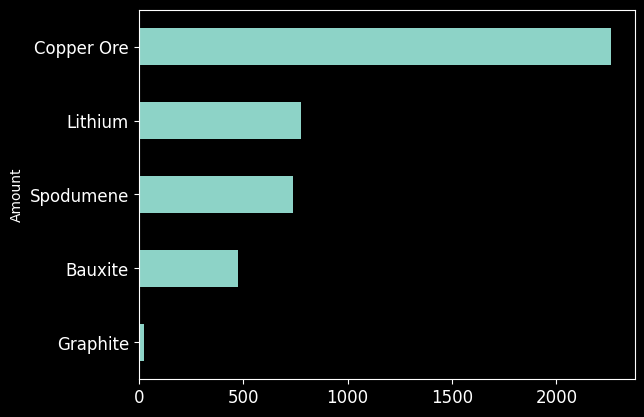

In [12]:
battery_resources_in_batteries_analysis = mnt_reform.analyse("p[jgne.*]R[cobalt_ground|nickel_ground|lithium_brine|" 
                "spodumene_ground|manganese_ground|graphite_ground|bauxite_ground|copper_ground]")
battery_resources_in_batteries_analysis.view().bar()

Da der Laptop LFP(LiFePO4)-Batterien hat fehlen sowohl Nickel, Mangan als auch Kobalt, was in NMC-Batterien ist. 

In [13]:
mnt_reform.analyse("P[category=batteries-and-accessories]i[child-labour]").view().table()

Indicators level of parts (7 of them only) in Device 'MNT Reform 2.0 Laptop':


#### Das Russlandgeschäft

In [16]:
mnt_reform.analyse("Mc[russia]").view_top(10).table()

Countries level of materials (russian federation only) in Device 'MNT Reform 2.0 Laptop':


In [17]:
mnt_reform.analyse("Rc[russia]").view_top(10).table()

Countries level of resources (russian federation only) in Device 'MNT Reform 2.0 Laptop':


Top 10 percentage of “countries level of resources (russian federation only)” within “countries level of resources” in Device 'MNT Reform 2.0 Laptop':


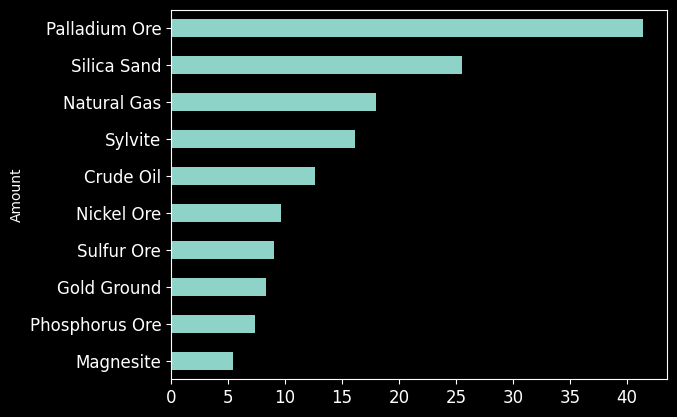

In [18]:
mnt_reform.analyse("Rc[russia]").view().percentageof(mnt_reform.analyse("Rc").view()).top(10).bar()

Countries (palladium ore only) in Device 'MNT Reform 2.0 Laptop':


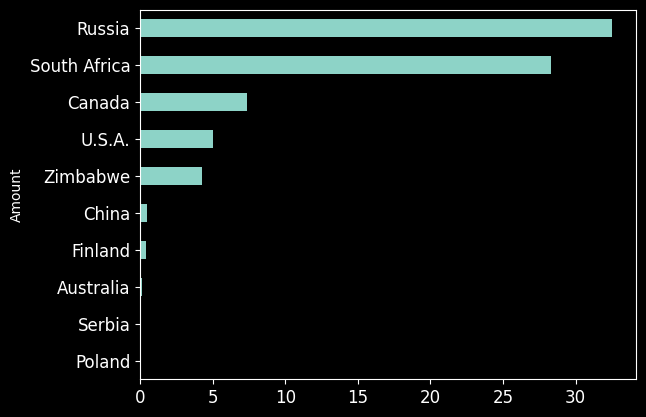

In [20]:
mnt_reform.analyse("r[palladium_ground]C").view_top(10).bar()

Indicators level of countries (palladium ore & human rights (child or forced labour) only) in Device 'MNT Reform 2.0 Laptop':


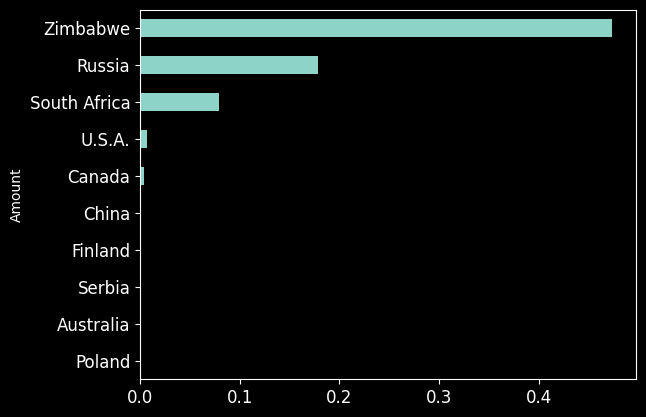

In [22]:
mnt_reform.analyse("r[palladium_ground]Ci[human-rights]").view().bar()

Countries (natural gas only) in Device 'MNT Reform 2.0 Laptop':


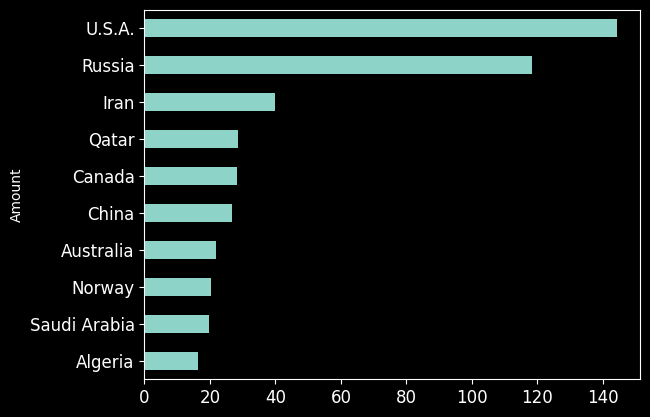

In [23]:
mnt_reform.analyse("r[natural_gas_ground]C").view_top(10).bar()

Top 10 percentage of “countries level of resources (ukraine only)” within “countries level of resources” in Device 'MNT Reform 2.0 Laptop':


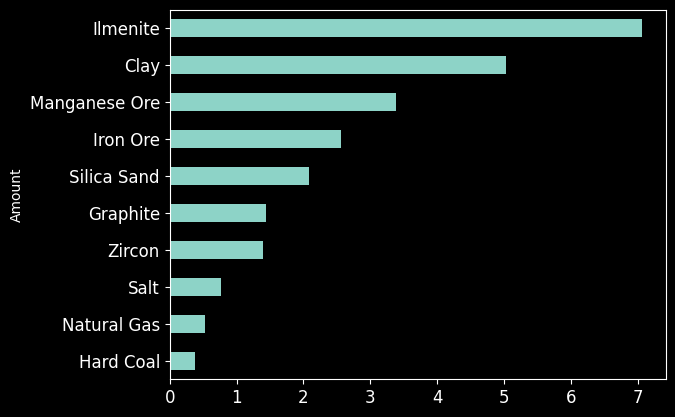

In [24]:
mnt_reform.analyse("Rc[ukraine]").view().percentageof(mnt_reform.analyse("Rc").view()).top(10).bar()

#### Datenerhebung ist Teil der Pflicht

In [26]:
mnt_reform.analyse("Di[child-labour-unknown]").view().percentageof(mnt_reform.analyse("Dc").view()).value_unit()

Value with unit of percentage of “indicators level of device (child labour (unknown) only)” within “countries level of device” in Device 'MNT Reform 2.0 Laptop':


'49.79616028784915 %'

In [27]:
mnt_reform.analyse("Di[forced-labour-unknown]").view().percentageof(mnt_reform.analyse("Dc").view()).value_unit()

Value with unit of percentage of “indicators level of device (forced labour (unknown) only)” within “countries level of device” in Device 'MNT Reform 2.0 Laptop':


'2.705245524070364 %'

In [28]:
mnt_reform.analyse("Di[wage-risk-unknown]").view().percentageof(mnt_reform.analyse("Dc").view()).value_unit()

Value with unit of percentage of “indicators level of device (wage risk (unknown) only)” within “countries level of device” in Device 'MNT Reform 2.0 Laptop':


'16.801618086464046 %'

In [34]:
100 * mnt_reform.analyse("M[unknown]").view().value() / mnt_reform.analyse("M").view().sum()

Value of materials (- unknown material - only) in Device 'MNT Reform 2.0 Laptop':
Sum of amount of materials in Device 'MNT Reform 2.0 Laptop':


0.6188699809740656

In [35]:
100 * mnt_reform.analyse("R[unknown]").view().value() / mnt_reform.analyse("R").view().sum()

Value of resources (- unknown resource - only) in Device 'MNT Reform 2.0 Laptop':
Sum of amount of resources in Device 'MNT Reform 2.0 Laptop':


0.03697322957103636

In [39]:
100 * mnt_reform.analyse("C[unknown_origin]").view().value() / mnt_reform.analyse("C").view().sum()

ValueError: Couldn't find a matching location where slug is unknown_origin.

### Designanalyse

In [41]:
mnt_reform.analyse("Pri[human-rights]").view().group(by="part category").top(10).table(columns=["part category",ft.AMOUNT,ft.UNIT,ft.SHARE])

Top 10 indicators level of parts (human rights (child or forced labour) only), grouped by part category in Device 'MNT Reform 2.0 Laptop':


In [43]:
mnt_reform.analyse("PMi[human-rights]").view_top(10).table(columns=ft.SHOW_STANDARD)

Indicators level of combinations of parts/materials (human rights (child or forced labour) only) in Device 'MNT Reform 2.0 Laptop':


In [44]:
mnt_reform.analyse("PMri[human-rights]").view().percentageof(mnt_reform.analyse("PMr").view()).bottom(20).table()

Bottom 20 percentage of “indicators level of combinations of parts/materials (human rights (child or forced labour) only)” within “resources level of combinations of parts/materials” in Device 'MNT Reform 2.0 Laptop':


#### Batterieauswahl

In [47]:
lfp = ft.Unit(database, ft.PART, "jgne-JGCFR18650")
nmc111 = ft.Unit(database, ft.PART, "jgne-JGCNR18650-nmc111")
nmc811 = ft.Unit(database, ft.PART, "jgne-JGCNR18650-nmc811")

In [49]:
lfp.analyse("Pi[human-rights]").view().value_unit()

Value with unit of indicators level of part (human rights (child or forced labour) only) in Part '18650 - 1800mAh 3.2V - 5.4A Battery Cell LiFePO4':


'9.727163588499375 g'

In [51]:
nmc111.analyse("Pi[human-rights]").view().value_unit()

Value with unit of indicators level of part (human rights (child or forced labour) only) in Part '18650 - 2200mAh 3.6V - 2.2A Battery Cell NMC 111':


'589.473242236819 g'

In [52]:
nmc811.analyse("Pi[human-rights]").view().value_unit()

Value with unit of indicators level of part (human rights (child or forced labour) only) in Part '18650 - 2200mAh 3.6V - 2.2A Battery Cell NMC 811':


'193.86410215771505 g'

## Interessantes

### Der Rucksack eines Laptop

In [54]:
mnt_reform.analyse("Dm").view().value_unit()

Value with unit of materials level of device in Device 'MNT Reform 2.0 Laptop':


'2195.5644306265212 g'

In [55]:
mnt_reform.analyse("Dr").view().value_unit()

Value with unit of resources level of device in Device 'MNT Reform 2.0 Laptop':


'84443.38690571467 g'

In [57]:
mnt_reform.analyse("Dr").view().multipleof(mnt_reform.analyse("Dm").view()).value_unit()

Value with unit of multiple of " resources level of device " within " materials level of device " in Device 'MNT Reform 2.0 Laptop':


'38.46090131894608 times'

### Das Gehäuse ist schwer, tut aber nicht so weh

Combinations of parts/materials (18 of them only) in Device 'MNT Reform 2.0 Laptop':


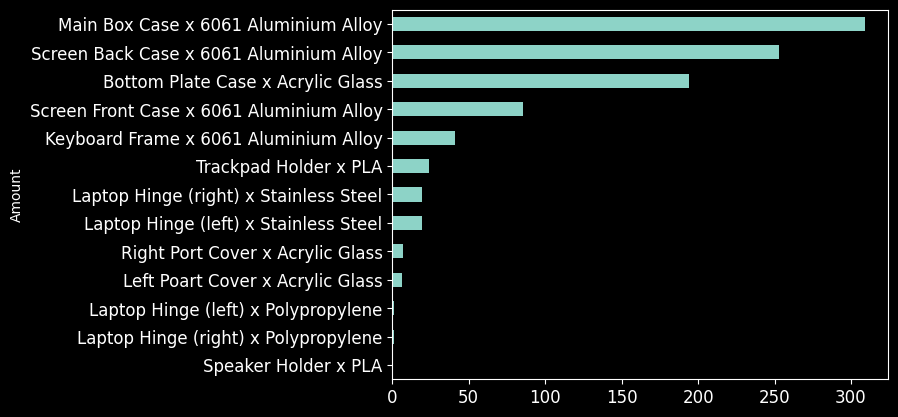

In [59]:
mnt_reform.analyse("P[category=case]M").view().bar()

Top 5 materials level of parts, grouped by part category in Device 'MNT Reform 2.0 Laptop':


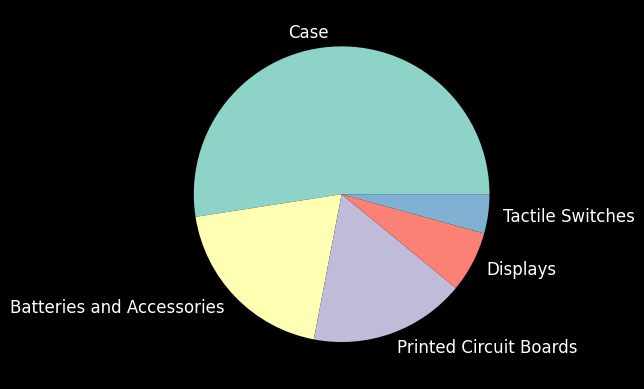

In [60]:
mnt_reform.analyse("Pm").view().group(by="part category").top(5).pie()

Top 10 indicators level of parts (child labour only), grouped by part category in Device 'MNT Reform 2.0 Laptop':


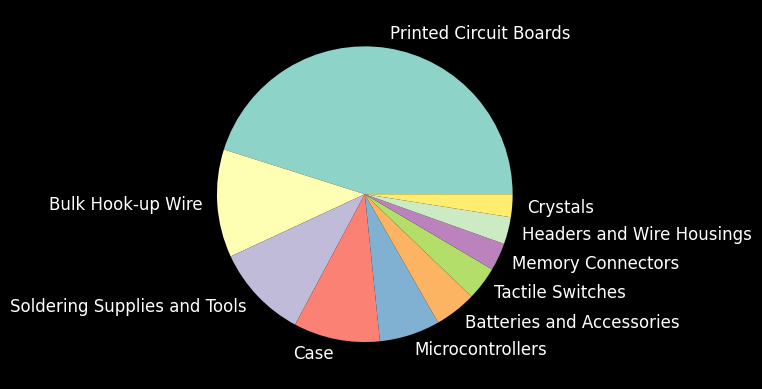

In [61]:
mnt_reform.analyse("Pri[child-labour]").view().group(by="part category").top(10).pie()

Top 10 resources level of parts, grouped by part category in Device 'MNT Reform 2.0 Laptop':


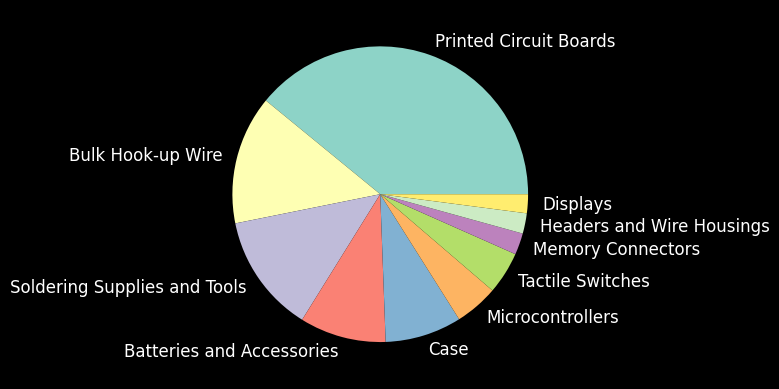

In [62]:
mnt_reform.analyse("Pmr").view().group(by="part category").top(10).pie()

Top 10 resources level of combinations of parts/materials where part category is printed circuit boards in Device 'MNT Reform 2.0 Laptop':


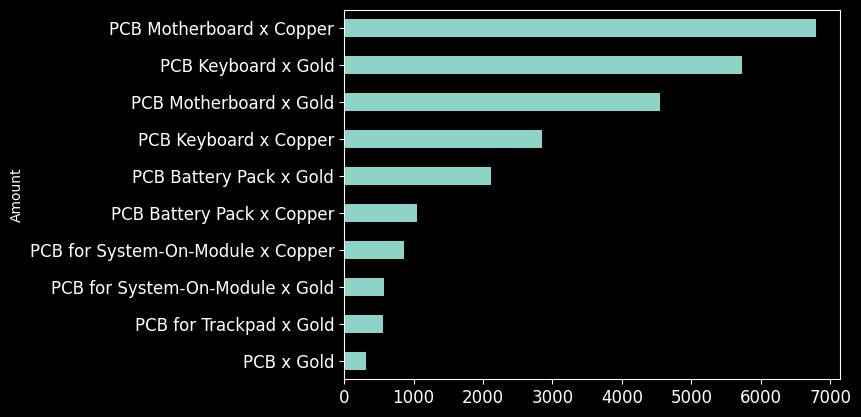

In [64]:
mnt_reform.analyse("P[category=pcb]Mr").view_top(10).bar()

### Gold macht den wesentlichen Unterschied

In [65]:
database.info(ft.PART, "texas_instruments-tpd12s521").table()

'texas_instruments-tpd12s521' in Parts:


In [66]:
database.info(ft.PART, "on-CM2020-00TR").table()

'on-cm2020-00tr' in Parts:


Amounts of part 'texas_instruments-tpd12s521' in Materials:


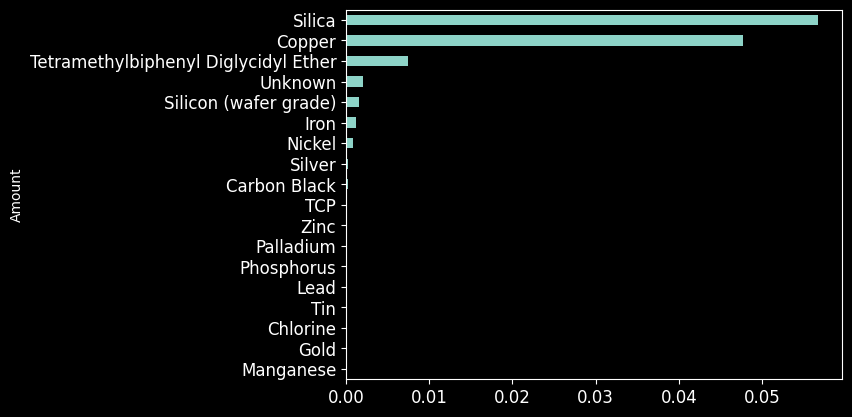

In [67]:
database.list(ft.PART, "texas_instruments-tpd12s521", ft.MATERIAL).bar()

Amounts of part 'on-cm2020-00tr' in Materials:


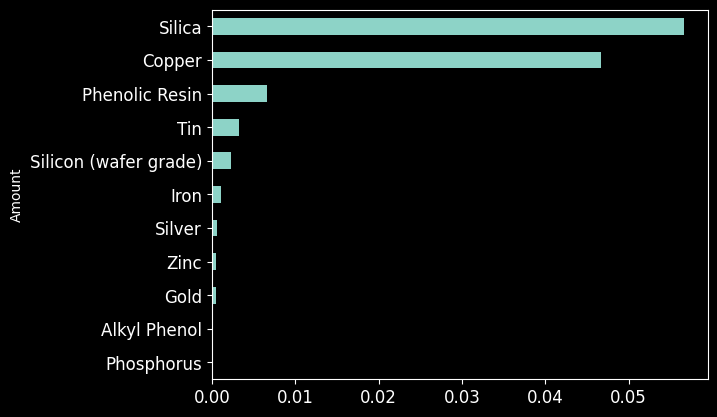

In [68]:
database.list(ft.PART, "on-CM2020-00TR", ft.MATERIAL).bar()

In [71]:
ti = ft.Unit(database, ft.PART, "texas_instruments-tpd12s521")
ti.analyse("Pi[child-labour]").view().value()

Value of indicators level of part (child labour only) in Part 'HDMI transmitter port protection and interface device':


0.23279081964924345

In [72]:
on = ft.Unit(database, ft.PART, "on-CM2020-00TR")
on.analyse("Pi[child-labour]").view().value()

Value of indicators level of part (child labour only) in Part 'HDMI Transmitter Port Protection and Interface Device TSSOP 38':


3.7320177444593736

In [75]:
on.analyse("pM").view(cutoff=0.0001).table(columns=[ft.AMOUNT,ft.UNIT,ft.NAME])

Materials in Part 'HDMI Transmitter Port Protection and Interface Device TSSOP 38':


In [76]:
ti.analyse("pM").view(cutoff=0.0001).table(columns=[ft.AMOUNT,ft.UNIT,ft.NAME])

Materials in Part 'HDMI transmitter port protection and interface device':


### Ein Laptop ist eine Goldgrube

In [77]:
all_materials = ft.Unit(database, ft.MATERIAL, ".*")
erdreich_all_materials = all_materials.analyse("Mr")
erdreich_all_materials.view_top(10).table(columns=[ft.AMOUNT,ft.UNIT,ft.NAME])

Resources level of material in 337 Materials:


In [78]:
mnt_reform.analyse("Dm[gold]").view().table()

Materials level of device (gold only) in Device 'MNT Reform 2.0 Laptop':


In [79]:
mnt_reform.analyse("Dm").view().table()

Materials level of device in Device 'MNT Reform 2.0 Laptop':


In [80]:
mnt_reform.analyse("Dm[gold]r").view().table()

Resources level of device (gold only) in Device 'MNT Reform 2.0 Laptop':


In [81]:
mnt_reform.analyse("Dmr").view().table()

Resources level of device in Device 'MNT Reform 2.0 Laptop':


In [82]:
mnt_reform.analyse("Dm[gold]r").view().multipleof(mnt_reform.analyse("Dm[gold]").view()).value()  # Bestätigung des Goldverhältnisses

Value of multiple of " resources level of device (gold only) " within " materials level of device (gold only) " in Device 'MNT Reform 2.0 Laptop':


253278.0955852224

In [83]:
all_materials.analyse("M[gold]r").view().value()  # Das gleiche

Value of resources level of material (gold only) in 337 Materials:


253278.09558522239

In [84]:
mnt_reform.analyse("Dm").view().multipleof(mnt_reform.analyse("Dm[gold]").view()).value()  # Dm als Laptoperdreich und Dm[gold] als das da rauszuholende Gold

Value of multiple of " materials level of device " within " materials level of device (gold only) " in Device 'MNT Reform 2.0 Laptop':


21478.065798267915

In [85]:
all_materials.analyse("M[gold]r").view().value() / mnt_reform.analyse("Dm").view().multipleof(mnt_reform.analyse("Dm[gold]").view()).value()

Value of resources level of material (gold only) in 337 Materials:
Value of multiple of " materials level of device " within " materials level of device (gold only) " in Device 'MNT Reform 2.0 Laptop':


11.792407098671234

In [87]:
laptop_motherboard_assembly = ft.Unit(database, ft.DEVICE, "mnt-MREFAMOB20R02")  # boundary_devices-nitrogen8m_som zum Vergleich
laptop_motherboard_assembly.analyse("Dm").view().multipleof(laptop_motherboard_assembly.analyse("Dm[gold]").view()).value()

Value of multiple of " materials level of device " within " materials level of device (gold only) " in Device 'Motherboard PCB Assembly':


4874.124719752456

In [88]:
laptop_motherboard_naked = ft.Unit(database, ft.PART, "pcbway-mnt_reform_motherboard_pcb")
laptop_motherboard_naked.analyse("Pm").view().multipleof(laptop_motherboard_naked.analyse("Pm[gold]").view()).value()

Value of multiple of " materials level of part " within " materials level of part (gold only) " in Part 'Motherboard PCB':


6575.141784686241

In [89]:
laptop_display_cable = ft.Unit(database, ft.DEVICE, "sino_media-FJ_D083_19072401")
laptop_display_cable.analyse("Dm").view().multipleof(laptop_display_cable.analyse("Dm[gold]").view()).value()

Value of multiple of " materials level of device " within " materials level of device (gold only) " in Device 'Display Cable FJ-D083-19072401':


32737.982603714085

In [ ]:
laptop_display_cable_connector = ft.Unit(database, ft.PART, "ipex-20453-230T-02")
laptop_display_cable_connector.analyse("Pm").view().multipleof(laptop_display_cable_connector.analyse("Pm[gold]").view()).value()

Value of multiple of " materials level of part " within " materials level of part (gold only) " in part 'VESA standard connector, Suitable for high-data-rate transfer (20 Gbps/lane), Mechanical locking bar, 0.5 mm pitch, Horizontal mating type micro-coaxial connector':


25180.252

In [90]:
mnt_reform.analyse("Pm").view().multipleof(mnt_reform.analyse("Pm[gold]").view()).sort(ascending=True).bottom(10).table()

Bottom 10 multiple of " materials level of parts " within " materials level of parts (gold only) " in Device 'MNT Reform 2.0 Laptop':


### Es ist kein Coltan im Laptop

In [94]:
database.info(ft.MATERIAL, "tantalum_powder").table()

'tantalum_powder' in Materials:


In [95]:
mnt_reform.analyse("M[tantalum_powder]").view().count()

Number of materials (tantalum only) in Device 'MNT Reform 2.0 Laptop':


0

### Kupfer ist auch wichtig

In [96]:
copper = ft.Unit(database, ft.MATERIAL, "copper")

In [97]:
copper.analyse("R").view().table()

Resources in Material 'Copper':


In [98]:
copper.analyse("C").view_top(10).table()

Countries in Material 'Copper':


Indicators level of countries (human rights (child or forced labour) only) in Material 'Copper':


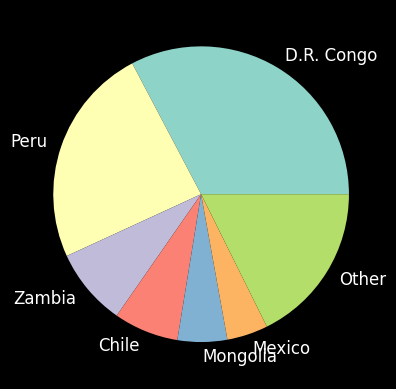

In [100]:
copper.analyse("Ci[human-rights]").view_top_other(6).pie()

In [101]:
copper.analyse("Mi[human-rights]").view().percentageof(copper.analyse("Mr").view()).value()

Value of percentage of “indicators level of material (human rights (child or forced labour) only)” within “resources level of material” in Material 'Copper':


2.086860969745111

Indicators level of countries (child labour (unknown) only) in Material 'Copper':


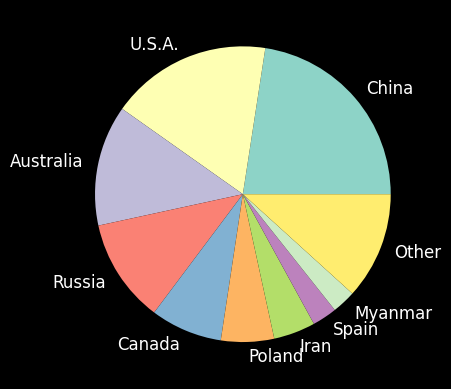

In [123]:
copper.analyse("Ci[child-labour-unknown]").view_top_other(9).pie()

In [110]:
copper.analyse("Mri[child-labour]").view().percentageof(copper.analyse("Mr").view()).value()

Value of percentage of “indicators level of material (child labour only)” within “resources level of material” in Material 'Copper':


1.7325231896580664

### Es steckt viel Erdöl und Erdgas in IT

In [114]:
mnt_reform.analyse("R").view().select("name","Crude Oil|Natural Gas").table()

Resources where name is crude oil|natural gas in Device 'MNT Reform 2.0 Laptop':


In [115]:
mnt_reform.analyse("Ri[child-labour]").view().select("name","Crude Oil|Natural Gas").table()

Indicators level of resources (child labour only) where name is crude oil|natural gas in Device 'MNT Reform 2.0 Laptop':


In [116]:
mnt_reform.analyse("Mr[oil_crude_ground|natural_gas_ground]").view_top(10).table()

Resources level of materials (natural gas,crude oil only) in Device 'MNT Reform 2.0 Laptop':


### Aus China kommen auch viele Rohstoffe

In [117]:
mnt_reform.analyse("C").view().select("name","China").table(columns=ft.SHOW_STANDARD)

Countries where name is china in Device 'MNT Reform 2.0 Laptop':


### Daten zu Kinderarbeit sind vielfach nicht vorhanden

In [118]:
mnt_reform.analyse("Ci[child-labour-unknown]").view_top(10).table(columns=[ft.RANK,ft.NAME])

Indicators level of countries (child labour (unknown) only) in Device 'MNT Reform 2.0 Laptop':


In [132]:
mnt_reform.analyse("Ci[child-labour-unknown]").view().group(by="location sub region").sort(by=ft.AMOUNT).table(columns=[ft.NAME])

Indicators level of countries (child labour (unknown) only), grouped by location sub region in Device 'MNT Reform 2.0 Laptop':


In [120]:
mnt_reform.analyse("C").view().group(by="location sub region").sort(by=ft.AMOUNT).table(columns=[ft.NAME])

Countries, grouped by location sub region in Device 'MNT Reform 2.0 Laptop':


In [121]:
mnt_reform.analyse("Ci[forced-labour-unknown]").view_top(10).table(columns=[ft.RANK,ft.NAME])

Indicators level of countries (forced labour (unknown) only) in Device 'MNT Reform 2.0 Laptop':


### Wo gehobelt wird...

In [125]:
mnt_reform.analyse("Ci[child-labour]").view_top(10).table(columns=[ft.RANK,ft.AMOUNT,ft.UNIT,ft.SHARE,ft.NAME,"location region","location sub region"])

Indicators level of countries (child labour only) in Device 'MNT Reform 2.0 Laptop':


In [126]:
mnt_reform.analyse("Ci[child-labour-inverse]").view_top(10).table(columns=[ft.RANK,ft.AMOUNT,ft.UNIT,ft.SHARE,ft.NAME,"location region","location sub region"])

Indicators level of countries (child labour (inverse) only) in Device 'MNT Reform 2.0 Laptop':


### Alle Elektronik ist gleich?

In [127]:
mnt_reform.analyse("Di[child-labour]").view().percentageof(mnt_reform.analyse("Dc").view()).value()

Value of percentage of “indicators level of device (child labour only)” within “countries level of device” in Device 'MNT Reform 2.0 Laptop':


2.044846312529755

In [128]:
nagerit_mouse = ft.Unit(database, ft.DEVICE, "nager-it_mouse")
nagerit_mouse.analyse("Di[child-labour]").view().percentageof(nagerit_mouse.analyse("Dc").view()).value()

Value of percentage of “indicators level of device (child labour only)” within “countries level of device” in Device 'Nager-IT computer mouse':


1.6960750827853854

In [129]:
mnt_reform.analyse("Di[forced-labour]").view().percentageof(mnt_reform.analyse("Dc").view()).value()

Value of percentage of “indicators level of device (forced labour only)” within “countries level of device” in Device 'MNT Reform 2.0 Laptop':


0.37994388014543434

In [130]:
nagerit_mouse.analyse("Di[forced-labour]").view().percentageof(nagerit_mouse.analyse("Dc").view()).value()

Value of percentage of “indicators level of device (forced labour only)” within “countries level of device” in Device 'Nager-IT computer mouse':


0.3907340048834524

In [131]:
database.list(ft.PORTFOLIO, "comparison", ft.DEVICE).table(columns=[ft.AMOUNT,ft.NAME])

Amounts of portfolio 'comparison' in Devices:


In [134]:
comparison = ft.Unit(database, ft.PORTFOLIO, "comparison")
comparison.analyse("Di[human-rights]").view().table()

Indicators level of devices (human rights (child or forced labour) only) in Portfolio 'All main devices in Fairtronics':


Indicators level of devices (child labour (unknown),forced labour,child labour,child labour (inverse) only) in Portfolio 'All main devices in Fairtronics':


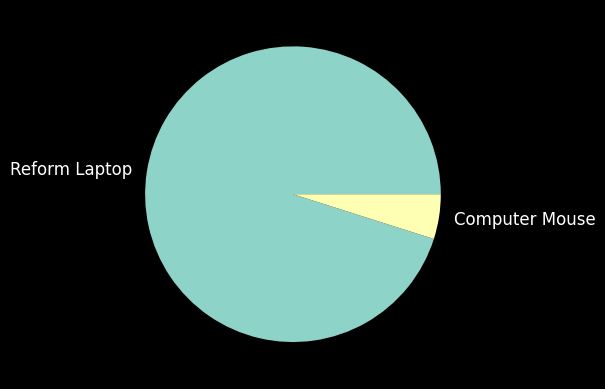

In [135]:
comparison.analyse("Di[child-labour|forced-labour]").view().pie()